## **Módulo 2: Implementação de classe de modelos de neurônio único**

## Introdução
Agora que introduzimos as classes como uma poderosa abstração em Python, revisitaremos os modelos de neurônio único que implementamos anteriormente. Ao usar classes para fazer nossa implementação, estamos mais próximos das bibliotecas de aprendizagem profunda que usaremos daqui em diante.

Vamos relembrar nosso modelo de neurônio único aplicado a uma tarefa de regressão em que estamos prevendo algum valor real $\hat{y}^{(i)} = f(x^{(i)})$ para algum ponto de dados $i$ (em que usamos a notação sobrescrita $(i)$ para indicar qual dos $n$ pontos de dados estamos considerando).

Pegaremos as funções que desenvolvemos anteriormente que implementam o cálculo direto de $y$ e seu gradiente em relação aos pesos, mas faremos delas métodos de uma classe Python do modelo de neurônio único. Isso nos permitirá armazenar os pesos como variáveis membros específicas da instância da classe.

## NumPy

Além de transformar nossos modelos em classes, também vamos usar a [Biblioteca NumPy](https://numpy.org/) para representar nossos vetores em vez das listas padrão do Python. O NumPy nos fornece muitas operações matemáticas em vetores e matrizes (arrays) e oferece benefícios em relação às listas padrão, incluindo melhorias de desempenho e a capacidade de escrever um código mais conciso. Abaixo, incluímos uma breve introdução à funcionalidade do NumPy que usaremos neste notebook. Se você estiver procurando uma introdução mais detalhada ou recursos adicionais, consulte os tutoriais do numpy.org [aqui](https://numpy.org/devdocs/user/quickstart.html).

In [1]:
# Primeiro, precisamos importar a biblioteca NumPy, normalmente usamos a abreviação np
import numpy as np

# Você pode criar uma matriz (array) numpy a partir de uma lista
x = np.array([1,2,3,4])
y = [1,2,3,4]
z = np.array(y)
print("x:", x)
print("y:", y)
print("z:", z)
print("Notice the difference between the numpy arrays x and z and the python list y.")

# Em vez de usar uma propriedade de comprimento como listas, o numpy é capaz de representar
# arrays multidimensionais, podemos ver as dimensões usando a propriedade shape
print("Shape of x:", x.shape)
# Aqui estamos criando uma matriz multidimensional de 2x3 preenchida com 1.'s
a = np.ones((2,3))
print("A multidimensional array")
print(a)
print("Shape of a:", a.shape)

# Uma das grandes vantagens do numpy é que nos permite realizar operações
# em vetores (ou mais geralmente, arrays) sem loops for
x = np.array([1,2])
w = np.array([2,2])
z = np.dot(x,w.T)
print("The dot product of x and transpose of w is:", z)

# Também podemos fazer subtração e multiplicação escalar
learning_rate = .01
# Como iremos realizar subtração com números decimais, certifique-se de inicializar
# seu w_new corretamente com o número decimal 0. e não o número inteiro 0
w_new = np.array([0.,0.])
## w_new = np.array([0,0]) Isso não funcionará!
w_new -= learning_rate * x

print("The value of w_new:", w_new)

# Isso deve cobrir todas as funcionalidades do numpy que estamos usando neste notebook.
# Se você desejar uma introdução mais detalhada, acesse:
# https://numpy.org/devdocs/user/quickstart.html

x: [1 2 3 4]
y: [1, 2, 3, 4]
z: [1 2 3 4]
Notice the difference between the numpy arrays x and z and the python list y.
Shape of x: (4,)
A multidimensional array
[[1. 1. 1.]
 [1. 1. 1.]]
Shape of a: (2, 3)
The dot product of x and transpose of w is: 6
The value of w_new: [-0.01 -0.02]


## Modelos de neurônio único

Aqui está uma revisão sobre o modelo de neurônio único.

Nossos modelos de neurônio único consistem em um único neurônio ou nó, que soma multiplicações ponderadas das características de uma amostra de entrada, adiciona um termo de viés e, em seguida, passa essa soma por uma função de ativação. Para regressão, usaremos uma função de ativação linear, ou seja, apenas a função identidade. Para classificação, usaremos uma função sigmoide.

Mais especificamente, nosso modelo de neurônio único calculará o produto escalar de um exemplo de treinamento de entrada $x^{(i)}$ com alguns pesos aprendidos $w$ e adicionando um viés aprendido $w_0$ para produzir uma pré-ativação $z$. Em seguida, aplicamos alguma função de ativação $f$ a $z$ para produzir uma ativação $a$, que para este neurônio único será nossa previsão de saída $\hat{y}$. Importante, $x$ e $w$ podem ser vetores, que agora representaremos como matrizes (arays) NumPy em nosso código Python. Usaremos uma notação de subscrito, por exemplo, $x_j$, para indicar a característica $j$ dentro dos dados de entrada $x$, onde $j$ varia de 1 a $m$ características totais.

A seguir está a notação matemática formal para o nosso modelo de neurônio único:

$$
z = x \cdot w^T + w_0\\
a = f(z) \\
y = a
$$

onde $x$ e $w$ são vetores de linha, e a função de ativação $f$ opera elemento por elemento no vetor $z$ para produzir um $a$ escalar.

## Modelo de regressão de neurônio único:

No bloco de código a seguir, implementamos a configuração necessária para uma classe de modelo de regressão de neurônio único em Python. Isso usará uma função linear $f(z) = z$ como função de ativação, sendo muito semelhante em funcionalidade ao que criamos no último notebook.

In [2]:
# Primeiro, precisamos importar os pacotes que serão usados para visualização.
# Você pode ignorar isso por enquanto, pois explicaremos com mais detalhes posteriormente.
import numpy as np
import math, random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class SingleNeuronRegressionModel():
    def __init__(self, in_features):
        # Criar/inicializar os pesos para o número de características
        self.w = np.zeros(in_features)
        self.w_0 = 0.

    def forward(self, x):
        if (x.shape != self.w.shape):
            raise ValueError("shape of input x and weights w should be same")

        # Calcular a pré-ativação z
        z = x @ self.w.T + self.w_0

        # Aplicar a função de ativação e retorna
        a = self.linear(z)
        return a

    # Função de ativação linear simples: retorna apenas a identidade
    def linear(self, z):
        return z

In [4]:
# Teste de saída do modelo para um único ponto de dados 2D:
regression_model = SingleNeuronRegressionModel(in_features=2)
regression_model.w = np.array([5, 3])
regression_model.w_0 = -8

x = np.array([1,2])
y = regression_model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output -1


## Treinar nosso modelo de regressão - descida do gradiente

Agora que implementamos uma classe de modelo de regressão, queremos implementar o mesmo algoritmo de treinamento de antes. Lembre-se de que queremos minimizar uma função de custo, $J$, em que $J$ é a soma total de perdas $L$ em nossos dados de treinamento:

$$ J = \sum_i^n L(\hat{y}^{(i)}, y^{(i)})$$

Para este exemplo simples, usaremos a perda de erro quadrático (SE, do inglês "squared error"), em que $\epsilon^{(i)}$ é nosso erro para qualquer amostra $i$:

$$ L_{SE}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2} (\hat{y_i} - y_i)^2 = \frac{1}{2} \epsilon^2 $$


Além disso, lembre-se do processo de treinamento que implementamos no último notebook.
* Realizaremos o loop de treinamento por um número especificado de iterações em nosso conjunto de dados, também conhecido como épocas.
* Em cada época, examinaremos cada par de entrada e saída $(x^{(i)},y^{(i)})$. Para cada par, faremos o seguinte:
  * Calcularemos a perda $L$ entre o valor correto $y$ e o valor previsto $\hat{y}$
  * Calcularemos o gradiente da perda em relação a cada peso
  * Atualizaremos os pesos com base no gradiente e na taxa de aprendizado, $\eta$:

$$ w_{j,new} = w_j - \eta \frac{dJ}{dw_j}$$


Embora estejamos implementando nosso modelo de neurônio único em uma classe, o conceito básico de aprendizado baseado em gradiente permanece o mesmo. Ainda estamos ajustando cada peso ao longo do gradiente da função de custo em relação a esse peso. No entanto, a localização onde esses pesos são armazenados é diferente e está dentro de cada instância de nossa classe.

### Descida do gradiente com perda de erro quadrático

Repetimos a descida de gradiente para a perda de erro quadrático aqui como referência:

No caso da perda de erro quadrático, para qualquer ponto de dados de amostra $i$, isso é calculado como:

$$ \frac{dJ}{dw_j} = \frac{dL_{SE}}{dw_j}
  = \frac{dL_{SE}}{d\hat{y}} \frac{d\hat{y}}{dw_j}
  = (\hat{y} - y) \frac{d\hat{y}}{dw_j} $$

É importante observar que precisamos ser capazes de calcular o gradiente da saída do modelo $\hat{y}$ em relação a cada peso:

$$ \frac{d\hat{y}}{dw_j} = \frac{df(z)}{dz} \frac{dz}{dw_j} $$

Para a função de ativação linear $f(z) = z$, o primeiro termo é muito simples: $\frac{df(z)}{dz} = 1$.

Para o segundo termo, lembre-se de que

$$ z = w_0 + x_1 \cdot w_1 + \cdots + x_j \cdot w_j + \dots + x_m \cdot w_m $$

então $\frac{dz}{dw_j} = x_j$, exceto para $w_0$, em que $\frac{dz}{dw_0} = 1.$

### Implementação da descida do gradiente -- perda de erro quadrático:

In [5]:
# Primeiro, atualizaremos nossa classe com um método de gradiente.
class SingleNeuronRegressionModel():
    def __init__(self, in_features):
        # Criar/inicializar os pesos para o número de características
        self.w = np.zeros(in_features)
        self.w_0 = 0.

    def forward(self, x):
        # Calcular a pré-ativação z
        z = x @ self.w.T + self.w_0

        # Aplicar a função de ativação e retornar
        a = self.linear(z)
        return a

    # Função de ativação linear simples: apenas retorna a identidade
    def linear(self, z):
        return z

    # Calcular e salvar o gradiente da saída em relação a
    # cada peso para a ativação linear
    def gradient(self, x):
        self.grad_w = x
        self.grad_w_0 = 1.

    # Atualizar os pesos com base nos gradientes e na taxa de aprendizado
    def update(self, grad_loss, learning_rate):
        # Aqui, grad_loss é o gradiente da perda em relação à saída.
        # Isso é fornecido externamente, com base na função de perda
        # Sendo usada para o treinamento deste modelo.
        model.w   -= grad_loss * self.grad_w   * learning_rate
        model.w_0 -= grad_loss * self.grad_w_0 * learning_rate

In [6]:
# Agora, nossa função de treinamento recebe uma instância do nosso modelo
# de neurônio único como argumento.
#
# Também organizamos nossos dados de entrada como uma matriz (array), num_samples x in_features,
# e nossos dados de saída (univariados) como uma matriz com dimensão num_samples.
def train_model_SE_loss(model, input_data, output_data,
                        learning_rate, num_epochs):
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 # Acompanhar a perda total em todo o conjunto de dados

        for i in range(num_samples):
            x = input_data[i,...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # Função de perda
            error = y_predicted - y
            loss = (error**2)/2
            total_loss += loss

            # Gradiente de nossa previsão em relação aos pesos
            model.gradient(x)

            # Gradiente da perda em relação à previsão, para erro quadrático
            grad_loss = error

            # Atualizar nosso modelo com base nos gradientes
            model.update(grad_loss, learning_rate)

        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: # Reportar a cada poucas épocas
            print("epoch", epoch, "has total loss", total_loss)

In [7]:
# Usaremos essa função para avaliar o desempenho do nosso modelo de regressão treinado.
# Isso calculará o erro quadrático médio em nossos dados.
def evaluate_regression_accuracy(model, input_data, output_data):
    total_loss = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = output_data[i]
        y_predicted = model.forward(x)
        error = y_predicted - y
        total_loss += (error**2)/2
    accuracy = total_loss / num_samples
    print("Our model has mean square error of", accuracy)
    return accuracy

## Exemplo de regressão com neurônio único

Agora que temos nossa função de modelo de regressão e a função de treinamento, tudo o que resta é chamá-las em um conjunto de dados. Abaixo, treinaremos o único neurônio no mesmo conjunto de dados fictício que usamos em nossa implementação inicial da função e visualizaremos o ajuste.

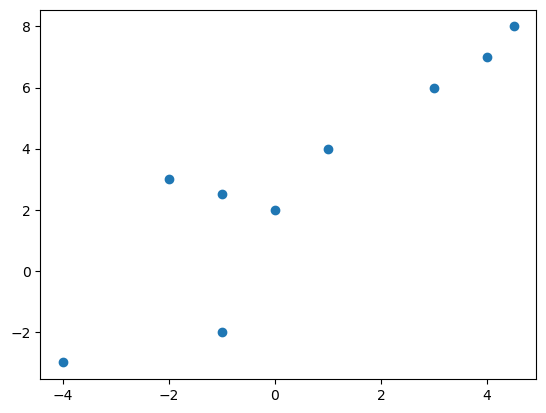

In [8]:
# Aqui, temos um conjunto simples de dados unidimensionais (1D)
# com 9 amostras de entrada (cada amostra tendo uma entrada x
# com 1 característica) e as respostas correspondentes y.
X_1D = np.array([[1], [-2], [3], [4.5], [0], [-4], [-1], [4], [-1]])
Y_1D = np.array([4,   3,    6,   8,     2,   -3,   -2,   7,   2.5])

# Esta função utilitária nos permitirá visualizar um dado conjunto de dados 1D.
# Você não precisa entender este código agora.
def plot_dataset_1D(x, y):
    x_np = np.array(x)
    y_np = np.array(y)
    plt.scatter(x_np[...,0], y_np)

# Esta função utilitária nos permitirá visualizar um ajuste 1D.
def plot_fit_1D(X, model):
    ylim = plt.ylim()
    x_np = np.array(X)
    y_pred = np.array([model.forward(x) for x in X])
    plt.plot(x_np[...,0], y_pred, color="red")
    #plt.scatter(x_np[...,0], y_pred, color="red")
    plt.ylim(ylim)

# Visualizar o conjunto de dados acima
plot_dataset_1D(X_1D, Y_1D)
#plot_fit_1D(X_1D, [1, 2], 0.5)

### Aprenda os pesos para o nosso modelo de regressão.

epoch 1 has total loss 75.15118164194563
epoch 10 has total loss 15.91945696552539
epoch 20 has total loss 12.004141710251176
epoch 30 has total loss 11.347063947860194
epoch 40 has total loss 11.234328476762197
epoch 50 has total loss 11.213995802293752
epoch 60 has total loss 11.209941165400341
epoch 70 has total loss 11.20898841694995
epoch 80 has total loss 11.208716012559227
epoch 90 has total loss 11.208624266940278
epoch 100 has total loss 11.208590113287263

Final weights:
[1.20325818] 2.4556015377014955
Our model has mean square error of 1.2040220467545657


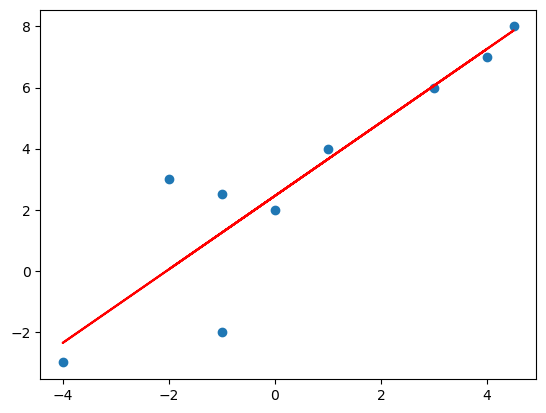

In [9]:
# Neste exemplo, definimos a taxa de aprendizado relativamente baixa
learning_rate = 0.01
epochs = 100

# Criamos uma instância da nossa classe SingleNeuronRegressionModel
# antes de iniciar o processo de treinamento
model = SingleNeuronRegressionModel(in_features=len(X_1D[0]))
train_model_SE_loss(model, X_1D, Y_1D, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_regression_accuracy(model, X_1D, Y_1D)

plot_dataset_1D(X_1D, Y_1D)
plot_fit_1D(X_1D, model)

# Classe base do modelo de neurônio único
Ao analisar nossa primeira classe de modelo de regressão, percebemos que ela não é muito flexível. Só podemos realizar tarefas de regressão com uma função de ativação linear. Para resolver isso, vamos criar uma classe chamada SingleNeuronModel, que atuará como a classe pai (ou superclasse) para diferentes tipos de modelos de neurônios únicos, incluindo classificação.

Para cada uma dessas classes, as variáveis membro $w$ e $w_0$ permanecem as mesmas, assim como a função **forward**.

As funções **activation** e **gradient** serão deixadas sem implementação na classe pai, e cada classe filha deverá implementá-las por conta própria. É isso que diferencia nossos modelos de neurônios únicos. Abaixo, incluímos uma implementação da classe pai SingleNeuronModel, juntamente com uma nova implementação do SingleNeuronRegressionModel mostrado anteriormente e uma implementação do SingleNeuronClassificationModel do último notebook.

## Modelo de classificação de neurônio único
Para o problema de classificação, mudaremos a função de ativação para uma sigmoide. Lembre-se de que isso comprime a pré-ativação $z$ para uma ativação (saída) que está entre 0 e 1. Também precisamos implementar o cálculo do gradiente com essa função de ativação sigmoide.

### Descida do gradiente com a função de perda do logaritmo negativo da verossimilhança (NLL)

Repetimos aqui a descida do gradiente para a perda do logaritmo negativo da verossimilhança como referência.

No caso da perda do NLL, para qualquer ponto de dados de amostra $i$, o gradiente de $J$ em relação aos pesos é calculado da seguinte forma:

$$ \frac{dJ}{dw_j} = \frac{dL_{NLL}}{dw_j}
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dw_j}
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dz} \frac{dz}{dw_j}
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\sigma{(z)}}{dz} \frac{dz}{dw_j} .
 $$

Para o primeiro termo, lembramos de nossa definição $L_{NLL} = y \log{\hat{y}} + (1-y)\log{(1-\hat{y})}$
e obtemos o seguinte após algumas operações algébricas:

$$ \frac{dL_{NLL}}{d\hat{y}} = \frac{y-\hat{y}}{\hat{y}(1-\hat{y})} .$$

Para o segundo termo, a derivada da função de ativação $\sigma(z)$, temos:

$$ \frac{d\sigma{(z)}}{dz} = \sigma(z)(1-\sigma(z)  = \hat{y}(1-\hat{y}).$$

E finalmente, o último termo é simplesmente $\frac{dz}{dw_j} = x$, exceto por $\frac{dz}{dw_0} = 1$.

In [11]:
# Agora, modificamos nossa implementação para criar uma classe abstrata
# SingleNeuronModel que será a classe pai de nossos modelos de regressão e classificação.
class SingleNeuronModel():
    def __init__(self, in_features):
        #self.w = np.zeros(in_features)
        #self.w_0 = 0.
        # Melhor ainda, definimos os pesos iniciais como valores pequenos distribuídos normalmente.
        self.w = 0.01 * np.random.randn(in_features)
        self.w_0 = 0.01 * np.random.randn()
        self.non_zero_tolerance = 1e-8 # Adicionar isso para evitar divisão por 0


    def forward(self, x):
        # Calcular e salvar a pré-ativação z
        self.z = x @ self.w.T + self.w_0

        # Aplicar a função de ativação e retornar
        self.a = self.activation(self.z)
        return self.a

    def activation(self, z):
        raise ImplementationError("método activation deve ser implementado pela subclasse")

    # Calcular e salvar o gradiente da saída em relação aos pesos
    def gradient(self, x):
        raise ImplementationError("método gradient deve ser implementado pela subclasse")

    # Atualizar os pesos com base nos gradientes e na taxa de aprendizado
    def update(self, grad_loss, learning_rate):
        model.w   -= grad_loss * self.grad_w   * learning_rate
        model.w_0 -= grad_loss * self.grad_w_0 * learning_rate


# Reimplementar o modelo de regressão com neurônio único usando a classe base SingleNeuronModel.
class SingleNeuronRegressionModel(SingleNeuronModel):
    # Função de ativação linear para o modelo de regressão
    def activation(self, z):
        return z

    # Gradiente da saída em relação aos pesos para ativação linear
    def gradient(self, x):
        self.grad_w = x
        self.grad_w_0 = 1.


# Nova implementação! Modelo de classificação com neurônio único
class SingleNeuronClassificationModel(SingleNeuronModel):
    # Função de ativação sigmoide para classificação
    def activation(self, z):
        return 1 / (1 + np.exp(-z) + self.non_zero_tolerance)

    # Gradiente da saída em relação aos pesos, para ativação sigmoide
    def gradient(self, x):
        self.grad_w = self.a * (1-self.a) * x
        self.grad_w_0 = self.a * (1-self.a)

In [12]:
# Teste: saída do modelo de regressão para um único ponto de dados 2D:
model = SingleNeuronRegressionModel(in_features=2)
model.w = np.array([5, 3])
model.w_0 = -8

x = np.array([1,2])
y = model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output 3


In [13]:
# Teste: saída do modelo de classificação para um único ponto de dados 2D:
model = SingleNeuronClassificationModel(in_features=2)
model.w = np.array([5, 3])
model.w_0 = -8

x = np.array([1,2])
y = model.forward(x)
print("input", x, "=> output", y)

input [1 2] => output 0.9525741177484588


## Exemplo de classificação com neurônio único

Agora, vamos treinar o SingleNeuronClassificationModel.

Lembre-se de que, para o problema de classificação, usaremos uma função de perda diferente: a função de perda de logaritmo negativo da verossimilhança (NLL). Isso permitirá que nosso código de treinamento anterior funcione para o problema de classificação, em vez do problema de regressão.

In [14]:
# Processo de treinamento usando a perda do logaritmo negativo da verossimilhança (NLL) -
# apropriada para problemas de classificação.

def train_model_NLL_loss(model, input_data, output_data,
                         learning_rate, num_epochs):
    non_zero_tolerance = 1e-8 # Adicionar isso aos cálculos de log para garantir que não tomemos o log de 0
    num_samples = len(input_data)
    for epoch in range(1, num_epochs+1):
        total_loss = 0 # Acompanhar a perda total em todo o conjunto de dados

        for i in range(num_samples):
            x = input_data[i,...]
            y = output_data[i]
            y_predicted = model.forward(x)

            # Função de perda NLL
            loss = -(y * np.log(y_predicted + non_zero_tolerance) + (1-y) * np.log(1-y_predicted + non_zero_tolerance))
            total_loss += loss

            # Gradiente da previsão em relação aos pesos
            model.gradient(x)

            # Gradiente da perda em relação à previsão, para NLL
            grad_loss = (y_predicted - y)/(y_predicted * (1-y_predicted))

            # Atualizar o modelo com base nos gradientes
            model.update(grad_loss, learning_rate)

        report_every = max(1, num_epochs // 10)
        if epoch == 1 or epoch % report_every == 0: # A cada poucas épocas, relatar
            print("época", epoch, "tem perda total", total_loss)

In [15]:
# Usaremos essa função para avaliar o desempenho do nosso classificador treinado
def evaluate_classification_accuracy(model, input_data, labels):
    # Contar o número de amostras classificadas corretamente dado um conjunto de pesos
    correct = 0
    num_samples = len(input_data)
    for i in range(num_samples):
        x = input_data[i,...]
        y = labels[i]
        y_predicted = model.forward(x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
        else:
            print("Misclassify", x, y, "with activation", y_predicted)
    accuracy = correct / num_samples
    print("Our model predicted", correct, "out of", num_samples,
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

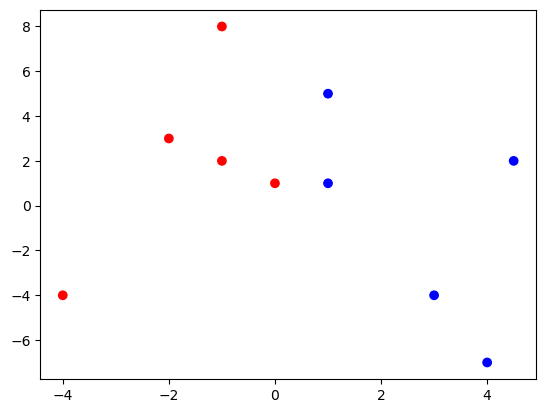

In [16]:
# Aqui, temos um conjunto de dados de pontos de dados 2D linearmente separáveis
input_data = np.array([[1, 1],
              [1, 5],
              [-2, 3],
              [3, -4],
              [4.5, 2],
              [0, 1],
              [-4, -4],
              [-1, 2],
              [4, -7],
              [-1, 8]])
# e seus rótulos correspondentes
labels = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]

# Esta função utilitária nos permitirá visualizar um determinado conjunto de dados 2D
# Você não precisa entender este código agora
def plot_dataset_2D(x, y):
    x_np = np.array(x)
    x_np.reshape(len(x), 2)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    plt.scatter(x_np[...,0], x_np[...,1], color=colors)

# Esta função utilitária nos permitirá visualizar uma fronteira de decisão 2D
def plot_decision_boundary_2D(w, w_0):
    ylim = plt.ylim()
    x1 = np.arange(-5,6)
    plt.plot(x1, (-w_0 - w[0]*x1)/w[1])
    plt.ylim(ylim)

# Visualizar o conjunto de dados acima
plot_dataset_2D(input_data, labels)
# plot_decision_boundary_2D([1, 0.0001], -0.5)

Podemos ver no gráfico que o conjunto de dados é linearmente separável, o que significa que podemos separar as amostras positivas (azul) das amostras negativas (vermelho) com uma linha reta.

## Treinando pesos reais – classificador de neurônio único

Agora que temos nosso mesmo exemplo de conjunto de dados, podemos treinar nossa nova classe de classificador de neurônio único da mesma maneira que antes. Lembre-se dos três diferentes ajustes que podemos fazer: os pesos iniciais, a taxa de aprendizado e o número de épocas. Cada um desses ajustes impacta a capacidade do modelo de convergir para uma fronteira de decisão.

Isso deve ser muito familiar, pois faremos os mesmos exercícios, apenas com a implementação da nova classe.

Lembre-se, como uma regra geral, queremos que nossa taxa de aprendizado seja pequena em comparação com os valores dos nossos dados de entrada, que nossos pesos iniciais sejam relativamente pequenos (muitas vezes, inicializados aleatoriamente) e que o número de épocas seja relativamente grande. Muitas pesquisas foram feitas para determinar as configurações ideais para esses parâmetros, então isso é uma simplificação.

época 1 tem perda total 6.543681276250157
época 10 tem perda total 3.140866631467925
época 20 tem perda total 2.4348476893878397
época 30 tem perda total 2.1023865486660434
época 40 tem perda total 1.8917762045164155
época 50 tem perda total 1.739757576523998
época 60 tem perda total 1.6218528996819046
época 70 tem perda total 1.5261785718206269
época 80 tem perda total 1.4460955399482525
época 90 tem perda total 1.3775245808863097
época 100 tem perda total 1.317782068166924

Final weights:
[ 1.69173146 -0.08139307] -0.17901284119647834
Our model predicted 10 out of 10 correctly for 100.0 % accuracy


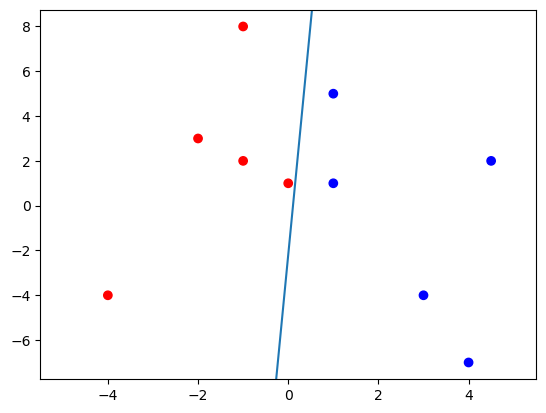

In [17]:
# Neste exemplo, definimos a taxa de aprendizado (learning rate) relativamente baixa.
# No entanto, treinamos apenas por algumas épocas, o que não é
# suficiente para convergir em um classificador preciso. Você pode ajustar
# o número de épocas (e/ou taxa de aprendizado) para obter um
# classificador preciso.
learning_rate = 0.01
epochs = 10
epochs = 100

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(model.w, model.w_0)

In [18]:
# Tente executar o modelo e a perda em todo o conjunto X (input_data) e Y (labels)
model.forward(input_data)

array([0.80710776, 0.75133654, 0.02173929, 0.99463112, 0.99930505,
       0.43526393, 0.00133117, 0.11572715, 0.99922172, 0.07433787])

In [19]:
evaluate_regression_accuracy(model, input_data, labels)

Our model has mean square error of 0.015395939649507731


0.015395939649507731

## Sua vez: conjunto de dados 3D

Agora que refizemos os exercícios em nossos conjuntos de dados 2D com nossa nova implementação de classe, é a sua vez de fazer o mesmo com o conjunto de dados 3D.

<Axes3D: >

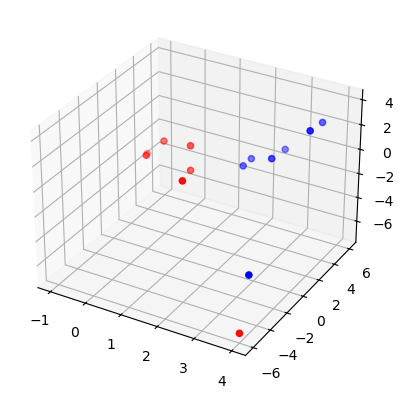

In [20]:
# Abaixo está um conjunto de dados 3D de amostras rotuladas binariamente. Você deverá ser capaz
# de usar as funções existentes para treinar um perceptron que classifique perfeitamente
# o conjunto de dados com um modelo de plano de decisão model_function
input_data = np.array([
     [1,1,1],
     [1,1,-1],
     [-1,4,-3],
     [2,4,-1],
     [3.5,6,2],
     [4,-6,-7],
     [2,-4,2],
     [4,-5,-3],
     [0,2,0],
     [3,2,1],
     [4,2,4],
     [2.5,6,-1],
     [0,0,0],
     [2,3,-1]])
labels = [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# Esta é uma função utilitária para exibir o conjunto de dados em um gráfico 3D
# Não se preocupe com este código por enquanto
def plot_3d_dataset(x, y):
    x_np_3d = np.array(x)
    x_np_3d.reshape(len(x),3)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(x_np_3d[...,0], x_np_3d[...,1],x_np_3d[...,2], color = colors)
    return ax

# Esta é uma função utilitária para exibir a fronteira de decisão em 3D para um determinado
# conjunto de pesos
def plot_3d_decision_boundary(ax, w, w_0):
  x = np.linspace(-1,4,10)
  y = np.linspace(-1,6,10)
  X,Y = np.meshgrid(x,y)
  Z = (-X*w[0] - Y*w[1] - w_0)/w[2]
  surf = ax.plot_surface(X, Y, Z)
  ax.set_zlim(-10,5)
  return
plot_3d_dataset(input_data, labels)

In [ ]:
# EXERCÍCIO: Preencha o seguinte código para obter um conjunto de pesos
# que classifique o conjunto de dados com uma precisão de 90% ou melhor:

model = ...
# INSERIR CÓDIGO AQUI

#print(model.w, model.w_0)
#ax = evaluate_classification_accuracy(model, input_data, labels)
#plot_3d_dataset(ax, input_data, labels)

## Solução para o exemplo de conjunto de dados 3D

época 1 tem perda total 9.471845283292923
época 10 tem perda total 7.133890512985477
época 20 tem perda total 6.472494602751554
época 30 tem perda total 5.972929075036679
época 40 tem perda total 5.553465362182965
época 50 tem perda total 5.193956007038831
época 60 tem perda total 4.883186386011892
época 70 tem perda total 4.6126936525035145
época 80 tem perda total 4.375671536451307
época 90 tem perda total 4.166597025408417
época 100 tem perda total 3.9809837282473772

Final weights:
[1.05756754 0.37502992 0.18161194] -1.5822687823304198
Misclassify [1. 1. 1.] 0 with activation 0.5079844741268189
Our model predicted 13 out of 14 correctly for 92.85714285714286 % accuracy


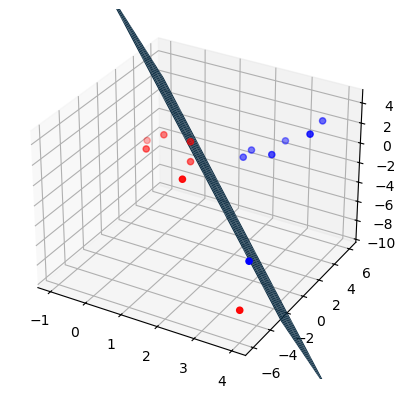

In [21]:
# Neste exemplo, definimos a taxa de aprendizado relativamente baixa
# No entanto, treinamos apenas por algumas épocas, o que não é
# suficiente para convergir em um classificador preciso
learning_rate = 0.01
epochs = 100
#epochs = 1000

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
ax = plot_3d_dataset(input_data, labels)
plot_3d_decision_boundary(ax, model.w, model.w_0)

## Dados não separáveis linearmente

Embora as classes sejam uma ferramenta muito poderosa, elas ainda não são poderosas o suficiente para permitir que nosso modelo de neurônio único determine fronteiras de decisão adequadas para dados não separáveis linearmente.

No entanto, agora que entendemos os conceitos básicos das classes, podemos começar a usar a biblioteca de aprendizagem de máquina completa [Pytorch](https://pytorch.org/). Essa biblioteca utiliza todos os conceitos que aprendemos até agora para criar redes neurais extremamente sofisticadas que nos permitirão lidar com conjuntos de dados mais complexos. Fique atento ao módulo 3, em que exploraremos toda a funcionalidade incrível que essa biblioteca oferece.

Se você deseja relembrar um conjunto de dados não linearmente separável, incluímos o mesmo abaixo. Mesmo com nossa nova implementação de classe, não conseguimos encontrar um classificador perfeito.

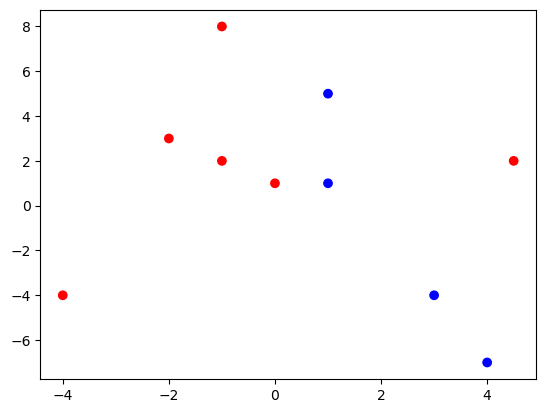

In [22]:
input_data = np.array([
     [1, 1],
     [1, 5],
     [-2, 3],
     [3, -4],
     [4.5, 2],
     [0, 1],
     [-4, -4],
     [-1, 2],
     [4, -7],
     [-1, 8]])
# Ao alterar o rótulo da nossa 4ª entrada [4.5, 2],
# tornamos este conjunto de dados não separável linearmente.
labels = [1, 1, 0, 1, 0, 0, 0, 0, 1, 0]

plot_dataset_2D(input_data, labels)

época 1 tem perda total 6.774127653050902
época 100 tem perda total 5.016471094867379
época 200 tem perda total 5.0028632092423795
época 300 tem perda total 5.002573762712514
época 400 tem perda total 5.002710958289232
época 500 tem perda total 5.002762765690751
época 600 tem perda total 5.002777742380838
época 700 tem perda total 5.002781839555796
época 800 tem perda total 5.002782944921142
época 900 tem perda total 5.002783242039575
época 1000 tem perda total 5.002783321825505

Final weights:
[ 0.45136506 -0.16969306] -0.6477719386488189
Misclassify [1. 1.] 1 with activation 0.40948374821032174
Misclassify [1. 5.] 1 with activation 0.2602110019237157
Misclassify [4.5 2. ] 0 with activation 0.7396181224092435
Our model predicted 7 out of 10 correctly for 70.0 % accuracy


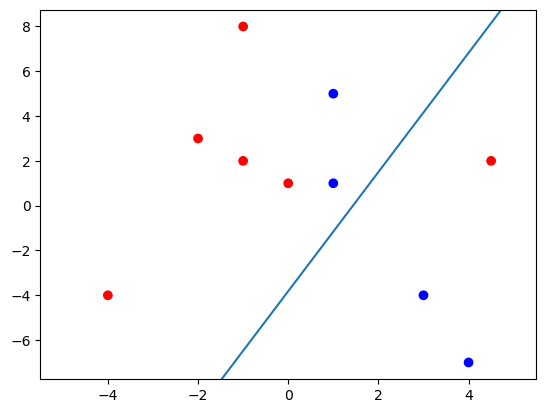

In [23]:
# Nosso algoritmo de treinamento tenta aprender um modelo "bom",
# mesmo que não seja possível encontrar um modelo perfeito (ou seja, não há
# um classificador linear de neurônio único que possa separar perfeitamente
# esses dados).
learning_rate = 0.01
epochs = 1000

model = SingleNeuronClassificationModel(in_features=len(input_data[0]))

train_model_NLL_loss(model, input_data, labels, learning_rate, epochs)
print("\nFinal weights:")
print(model.w, model.w_0)
evaluate_classification_accuracy(model, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(model.w, model.w_0)

## *Perceptrons* de múltiplas camadas - em direção a redes neurais mais profundas

Fique atento ao módulo 3, em que usaremos o PyTorch para introduzir redes neurais mais profundas para lidar com problemas como o mencionado acima. O PyTorch possui recursos que tornam extremamente fácil construir redes com **múltiplas camadas** que contêm **múltiplos nós**. Veremos que isso pode permitir fronteiras de decisão mais complexas do que apenas linhas ou planos e ter um desempenho melhor em dados como os mencionados acima.